In [1]:
import os 
print(os.getcwd())
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())


c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\score
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\userspace_data' created or already exists.
[]
Models and Dataframes not found, initializing a Recommender System from zero.
Error creating directory: 'RecommenderSystem' object has no attribute 'model_save_directory'
Generating User Space
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.


Selecting strings from each user: 100%|██████████| 1846/1846 [00:20<00:00, 91.49it/s] 
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
testing clusters in elbow method: 100%|██████████| 30/30 [00:24<00:00,  1.20user/s]


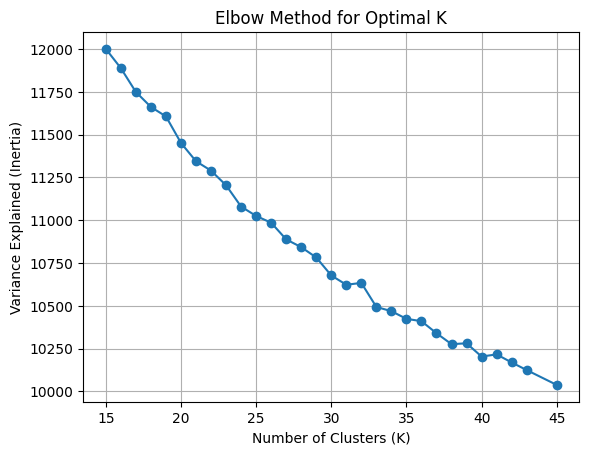

Optimal n_clusters is 20
KMeans(n_clusters=20)
Used KMeans(n_clusters=20) to clusterize.

Silhouette Scores:
KMeans: 0.3556899
Agglomerative Clustering: 0.3063692


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


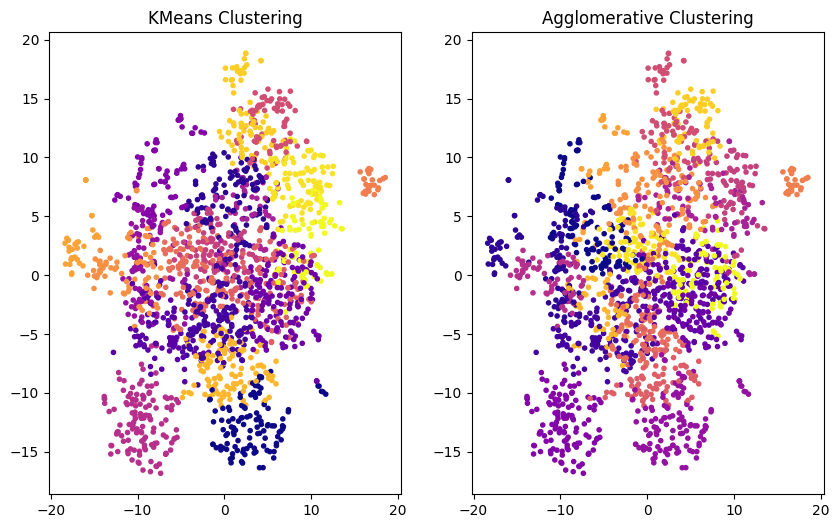

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


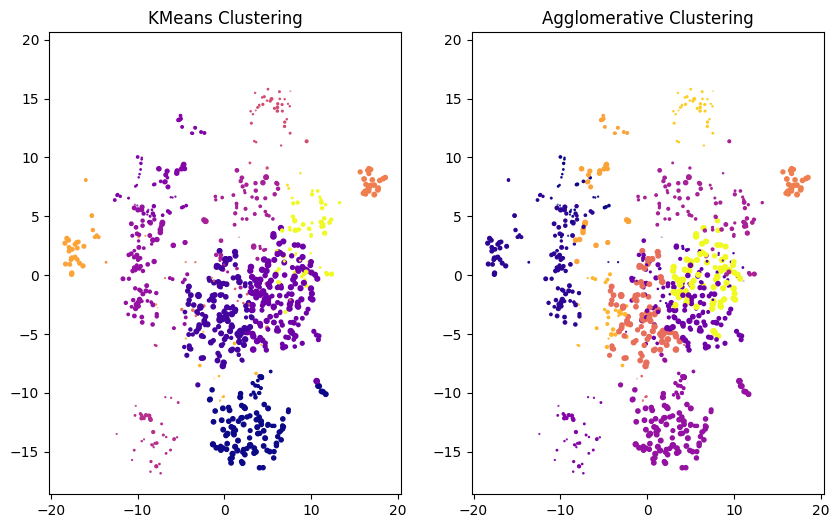

Exporting cluster model
Exporting clusters
Exporting vectorizer model
Done
Exporting vectorized corpus
Exporting vectorized corpus
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Loaded corpus data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Se han removido 75.15% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1378.


In [2]:
import os
from hito_4.utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm  
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
import matplotlib.pyplot as plt
# Assuming RS.vectorized_corpus is a DataFrame with the dataset
from matplotlib.colors import ListedColormap

from sklearn.manifold import TSNE 

train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

RS = RecommenderSystem(train,test,save_path=  os.getcwd())

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
clusters = pd.read_csv('C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Modeling\\userspace_data\\clusters.csv')
clusters.describe()

,Cluster
count,1846.000000
mean,8.601300
std,5.865269
min,0.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,19.000000


In [90]:
merge = pd.merge(train,clusters, on= 'taxnumberprovider')

def study_cluster_distro(cluster_data, n_cluster_of_interest, plot = False):
    merge = cluster_data.query(f'Cluster == {n_cluster_of_interest}')
    merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)
    if plot:
        merge['numeric'].hist(bins = 100)
        plt.show()
    gb = merge[['taxnumberprovider','adjudicada', 'numeric']].groupby(by=['taxnumberprovider','adjudicada']).count()
    gb = gb.unstack().fillna(0)


    gb['total'] = gb[('numeric', False)] +  gb[('numeric', True)]
    gb['adj_rate'] =( gb[('numeric', True)]/gb['total']).round(2)
    gb = gb[gb['total'] >= 10]
    if plot:
        display(gb)
        
        gb['adj_rate'].plot.density(title= 'Distribución de rate de adjudicación. n> 10 participaciones')
        plt.show()
        ax = gb['adj_rate'].hist(bins = 100)
        plt.title('Distribución probabilidad de adjudicaciones por usuario, todos los rubros.')
        plt.show()
    return gb['adj_rate']#merge['numeric']

In [91]:
distributions = [study_cluster_distro(merge,i) for i in range(max(merge['Cluster']))]

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)
C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)
C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [92]:
print(len(distributions))

19


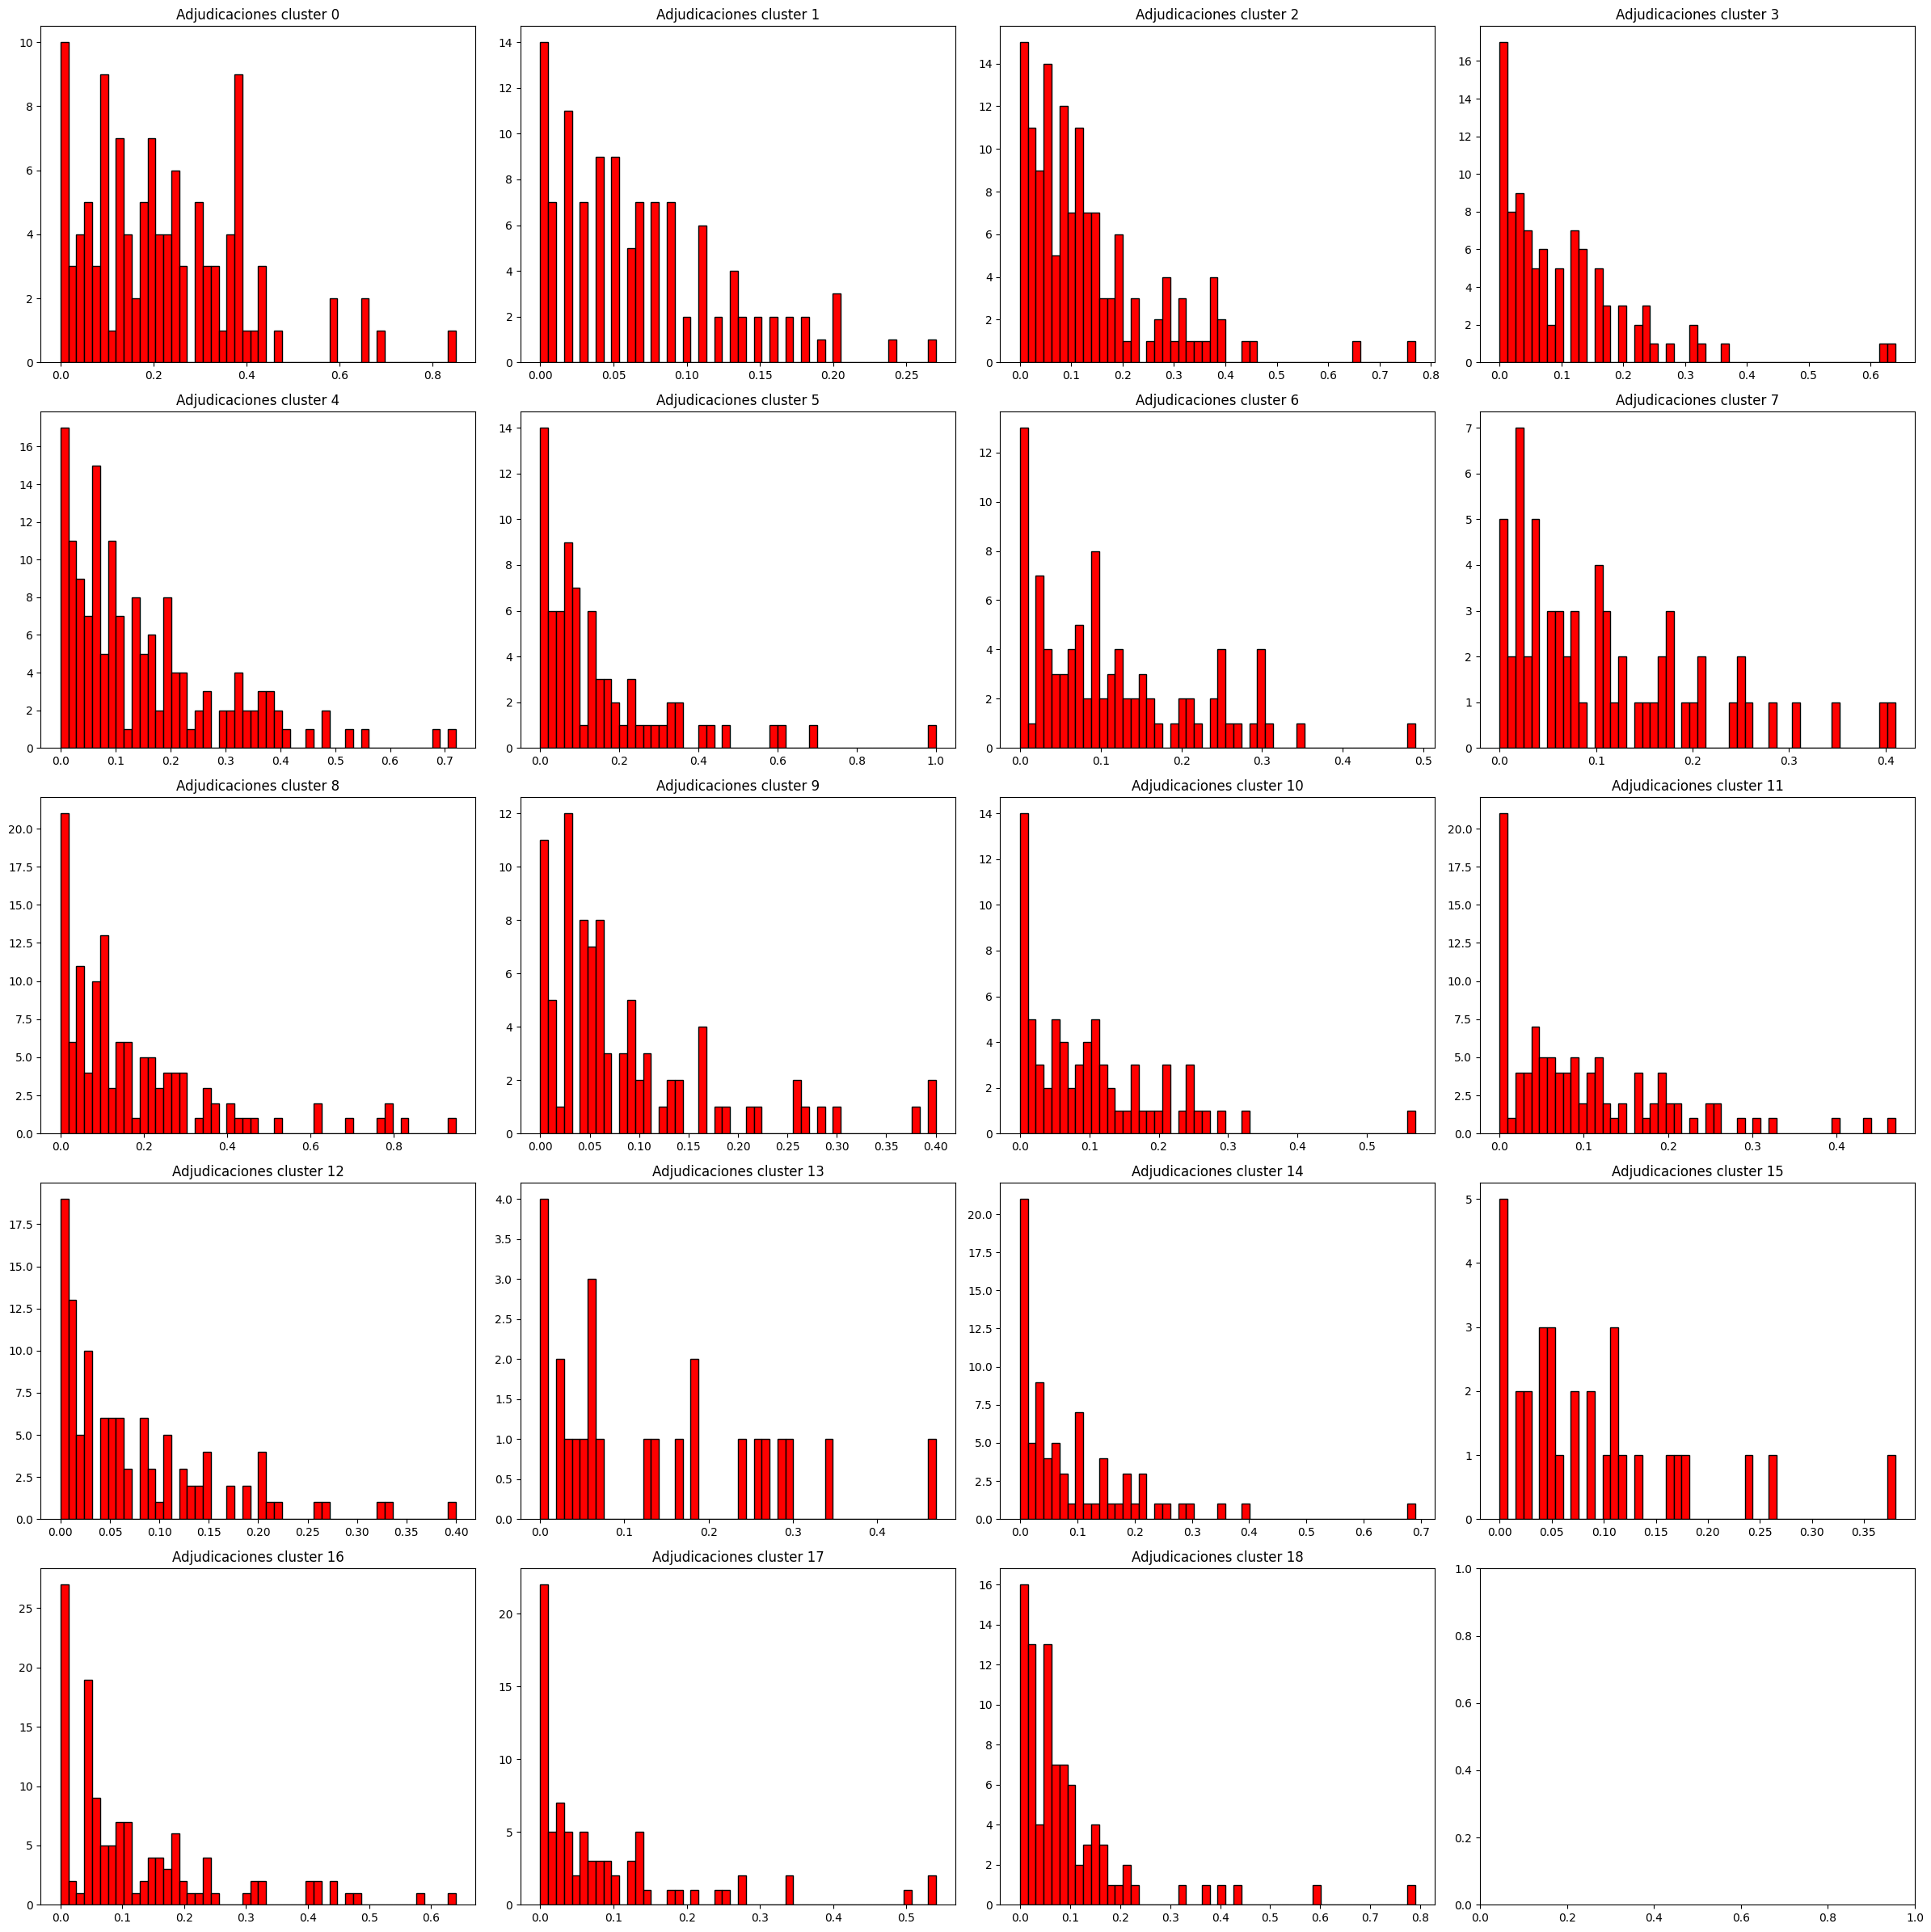

In [95]:
# Create a 12x3 subplot grid
fig, axs = plt.subplots(5, 4, figsize=(24, 24))

# Fill each subplot with data
counter = 0
for i in range(5):
    for j in range(4):
         
        if counter >= len(distributions):
            # If counter is equal to or greater than the length of distributions, exit the loop
            break
        axs[i, j].hist(distributions[counter], bins=50, color='red', edgecolor='black')
        axs[i, j].set_title(f'Adjudicaciones cluster {counter}')  # Add a subtitle

        counter += 1

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('output_figure.pdf')

# Show the plots
plt.show()


C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


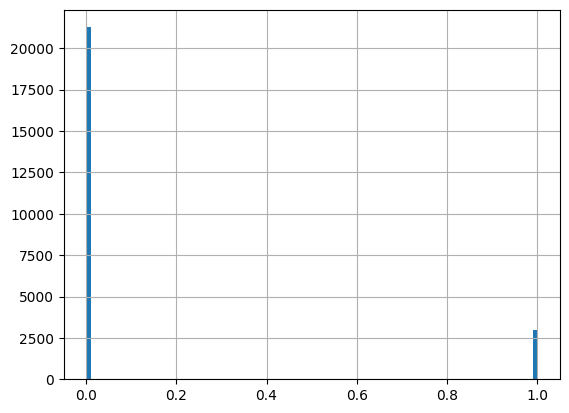

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

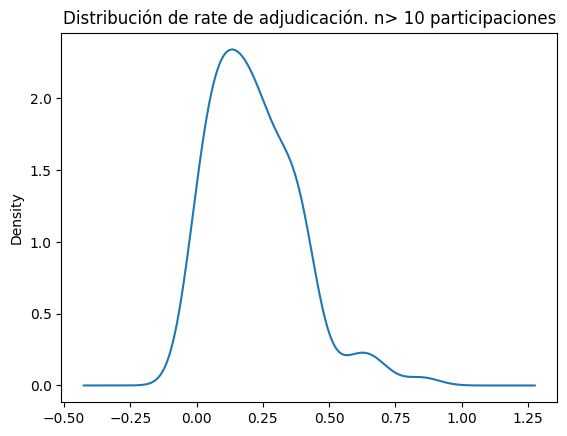

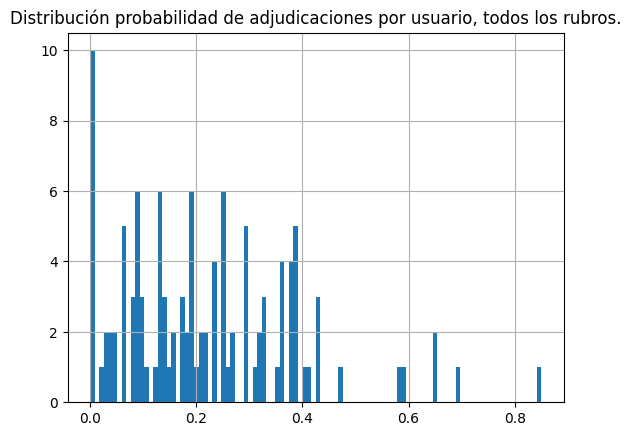

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


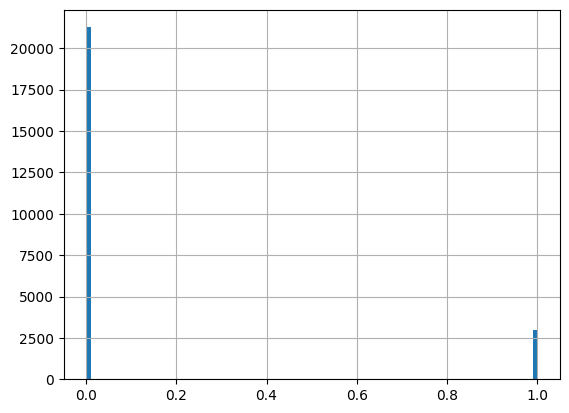

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

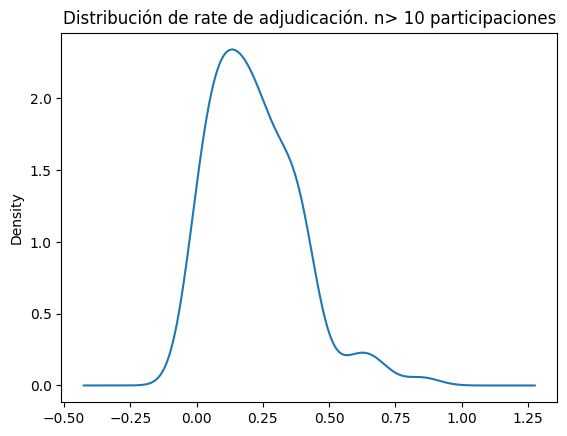

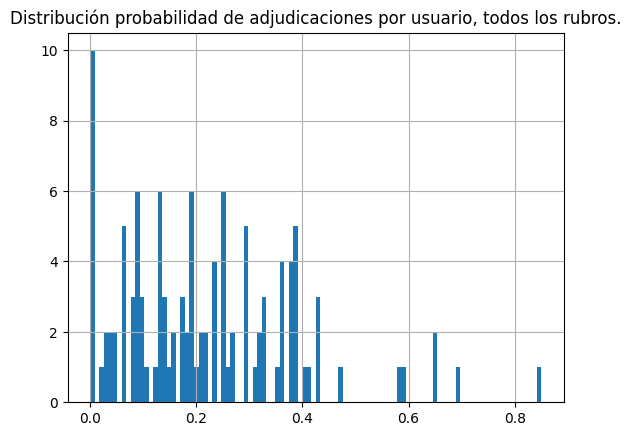

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


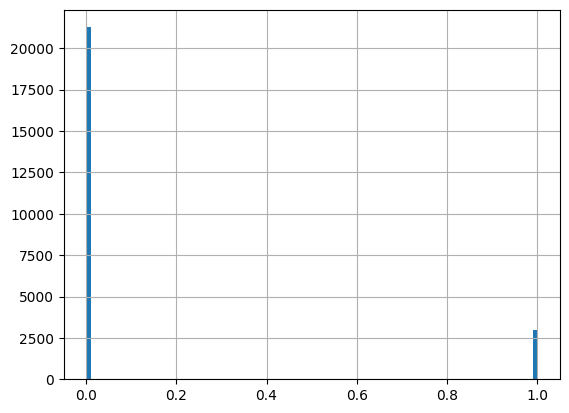

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

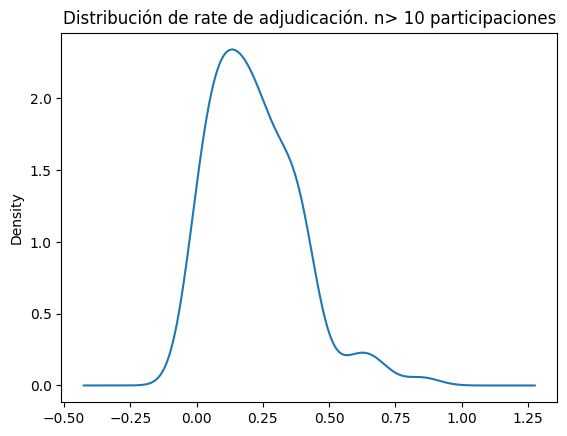

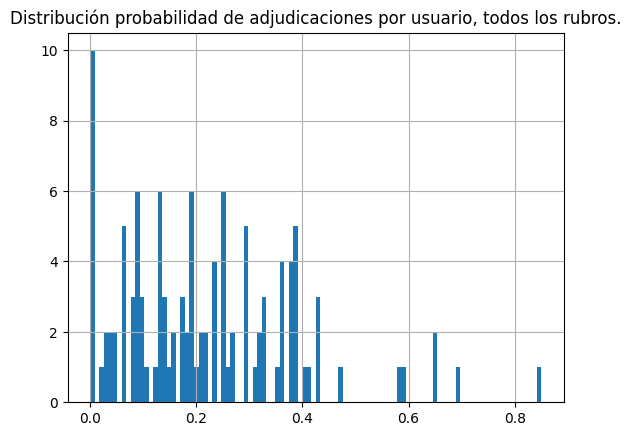

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


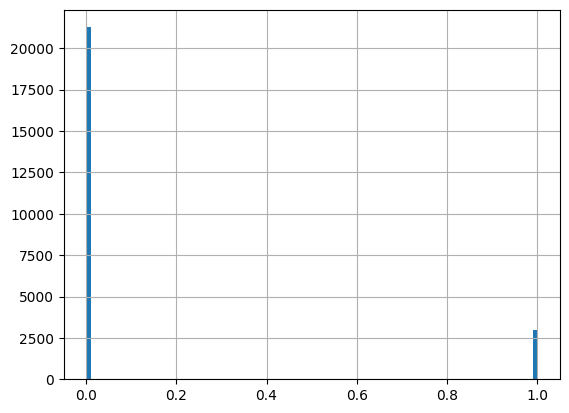

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

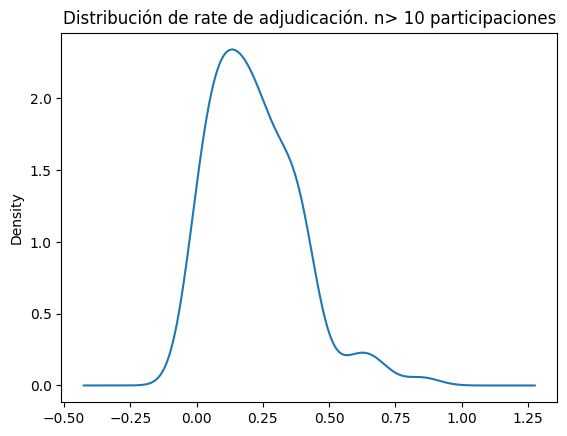

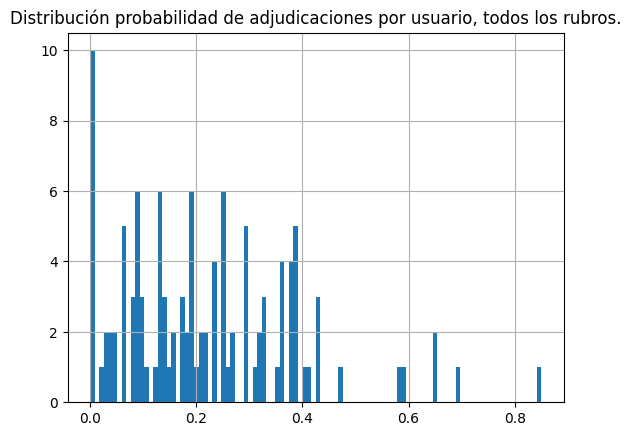

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


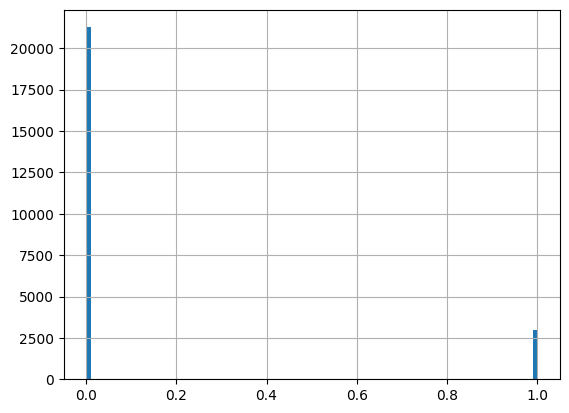

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

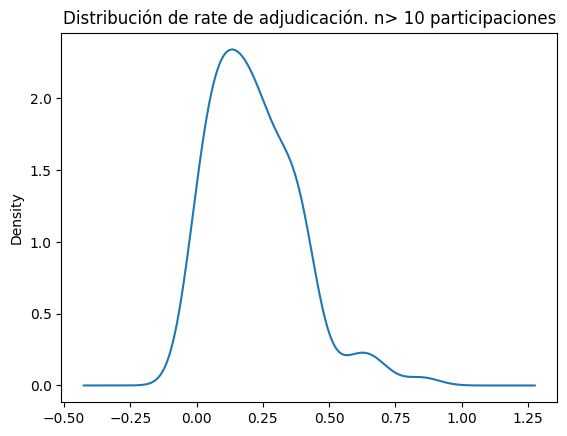

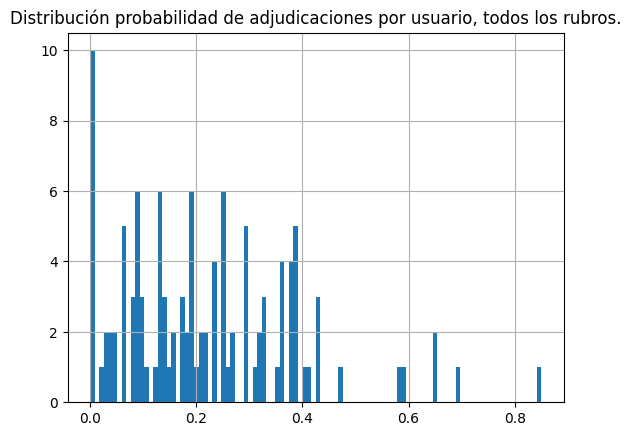

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


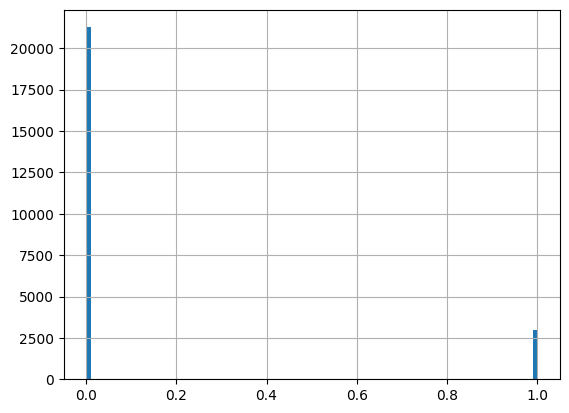

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

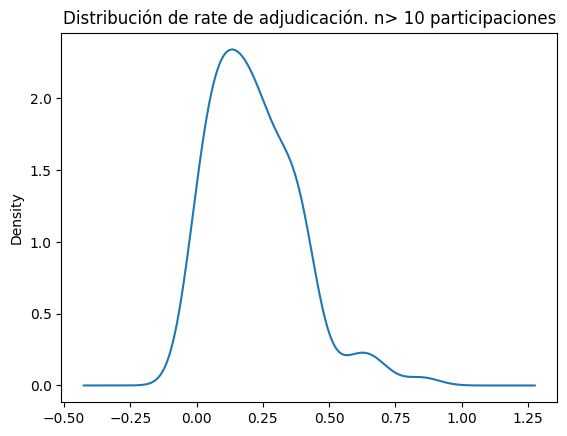

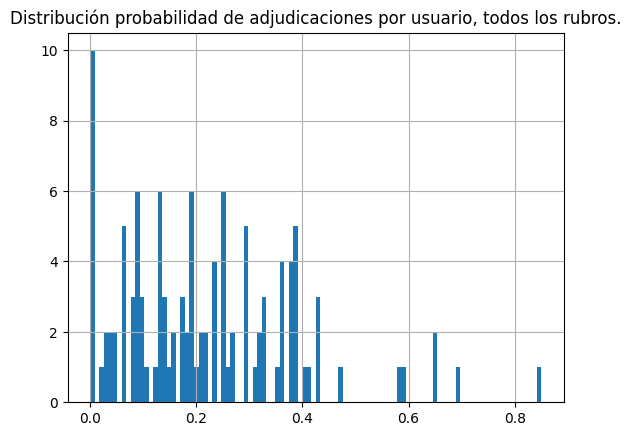

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


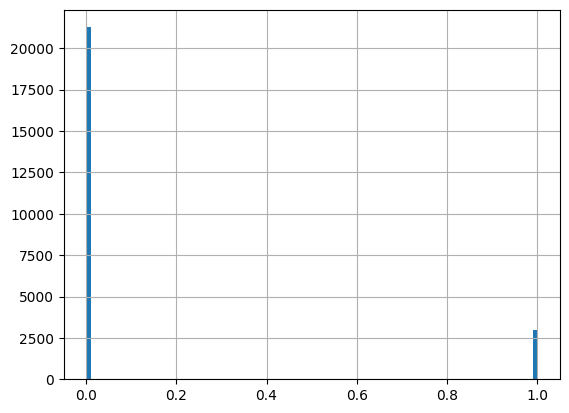

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

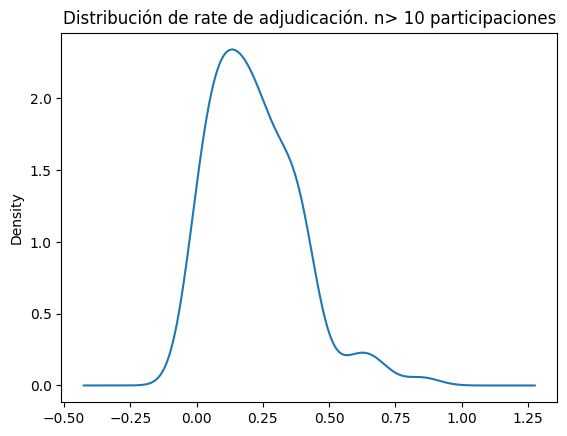

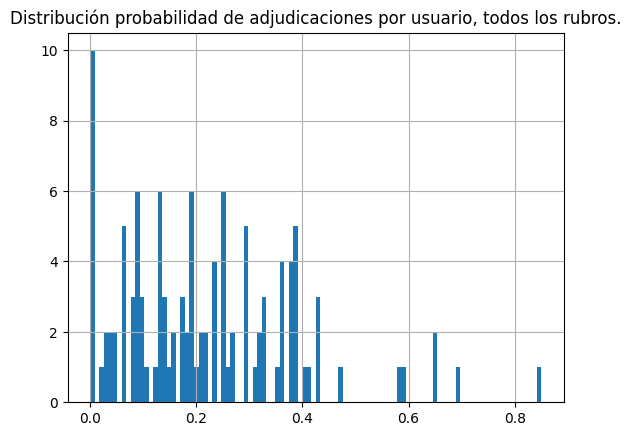

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


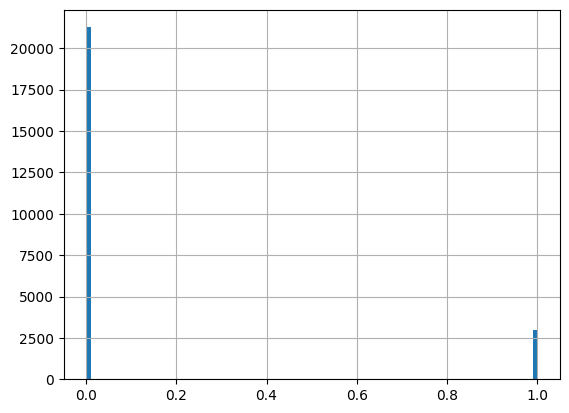

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

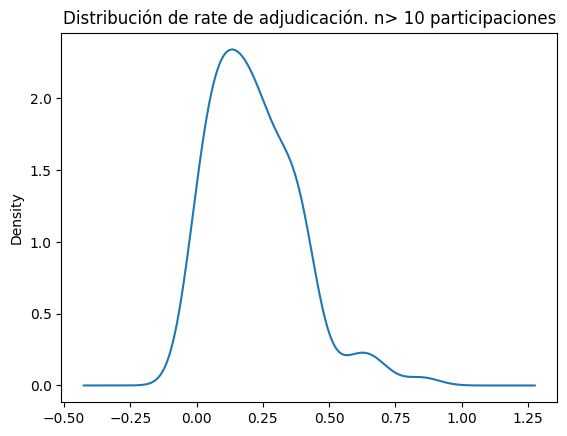

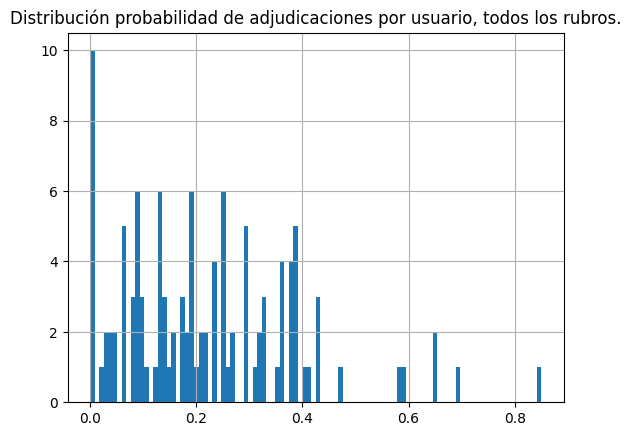

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


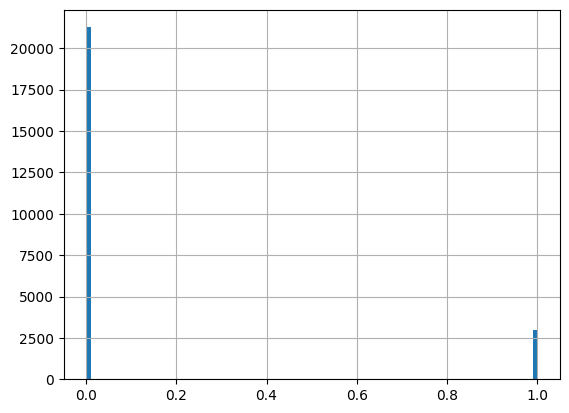

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

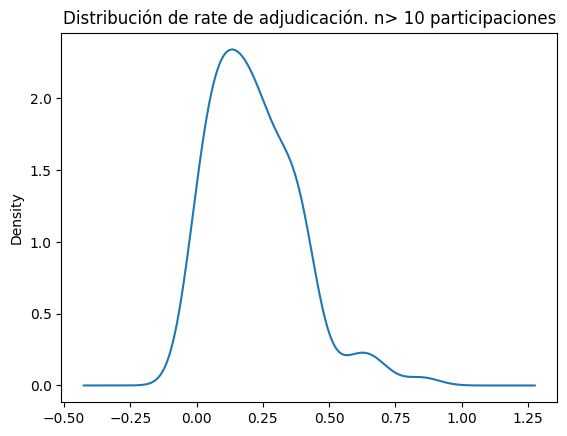

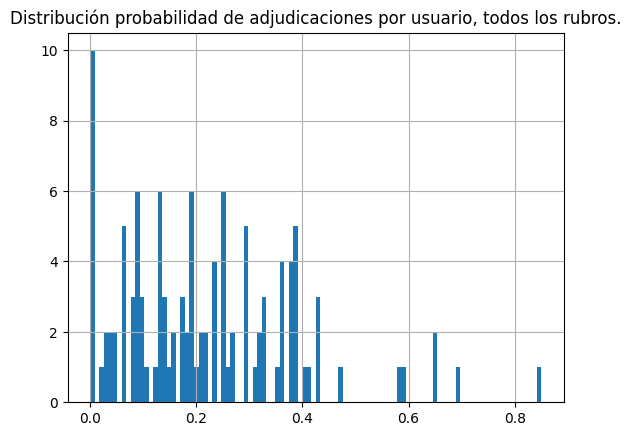

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


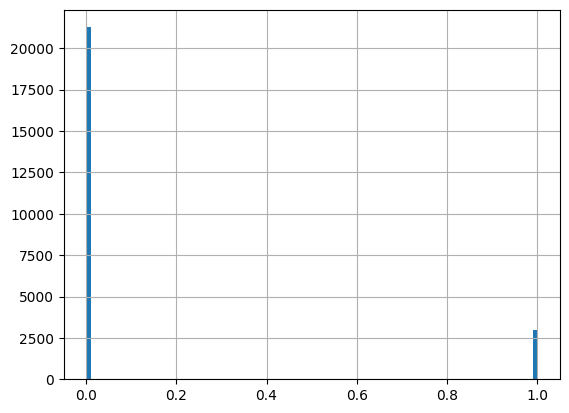

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

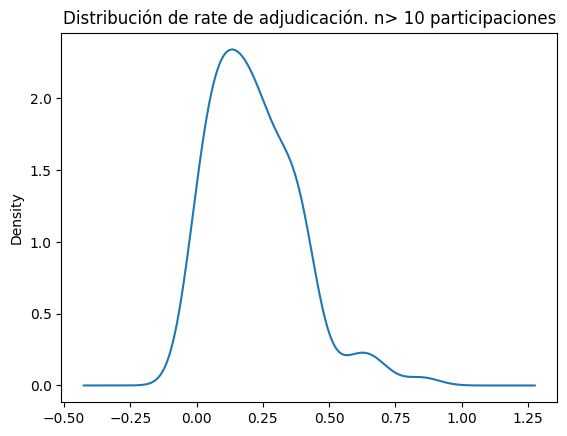

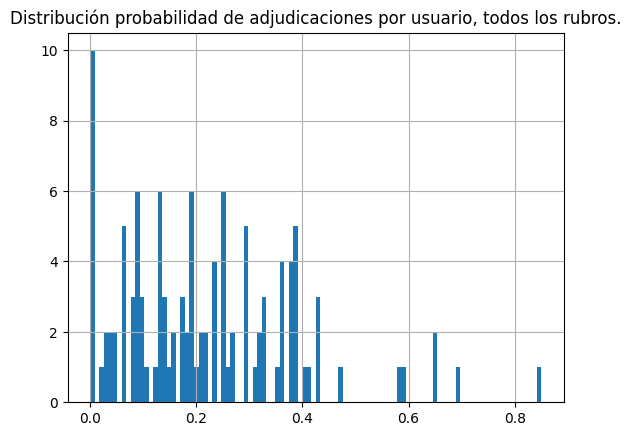

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


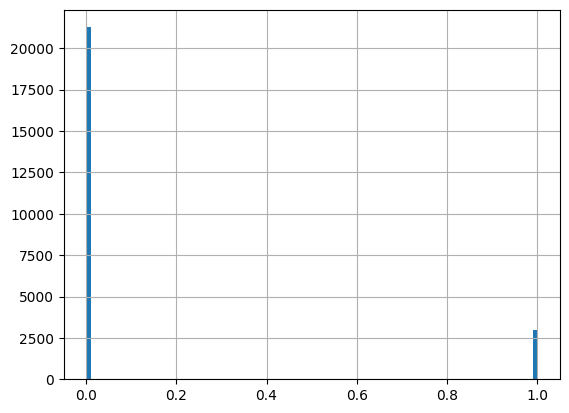

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

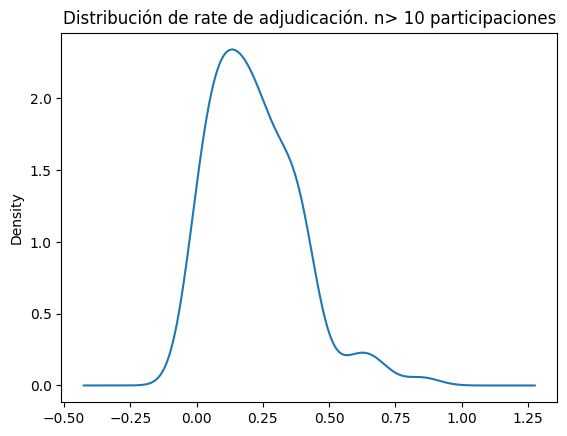

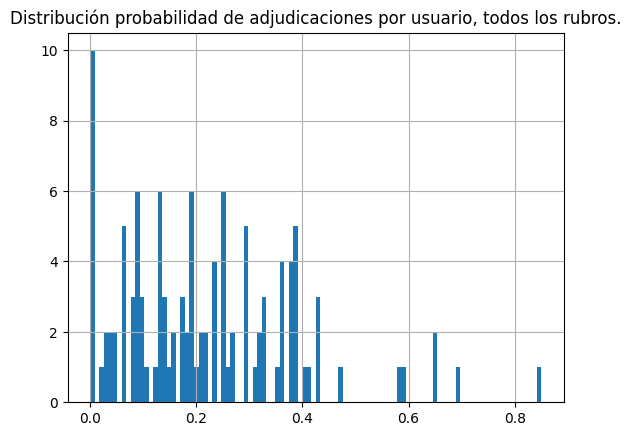

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


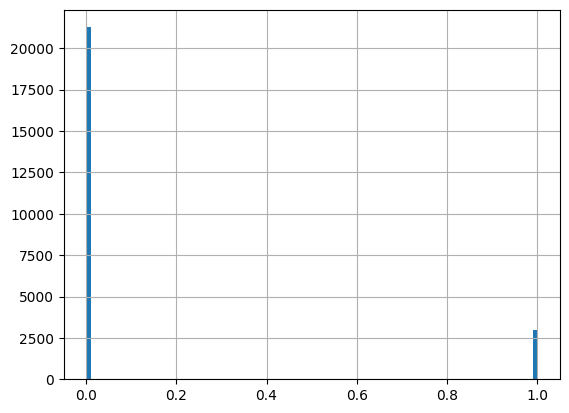

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

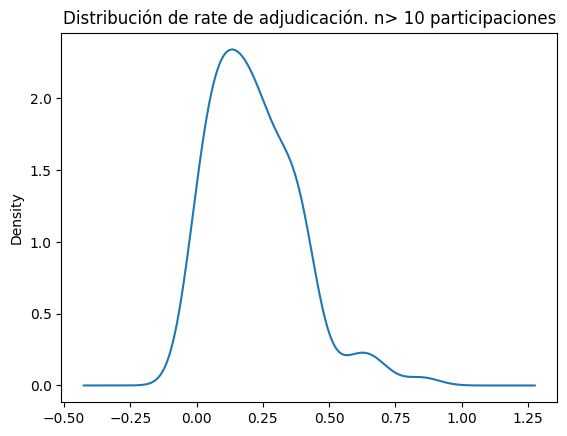

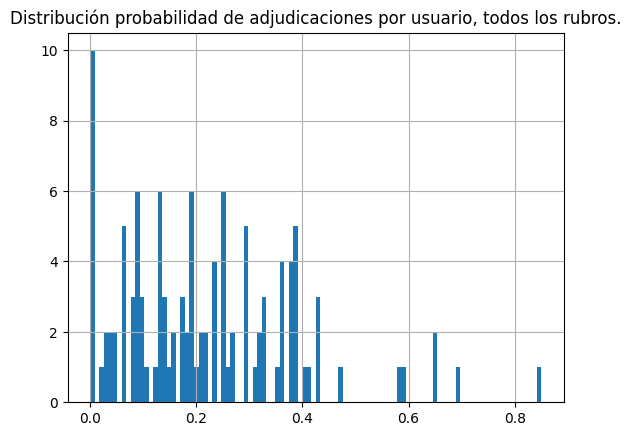

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


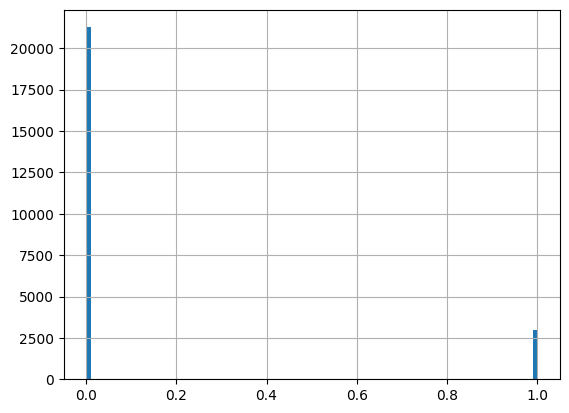

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

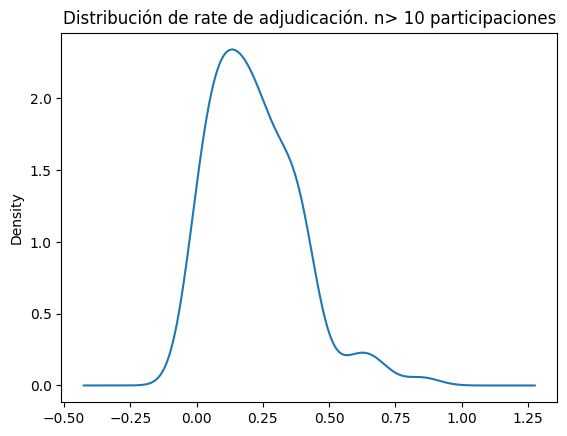

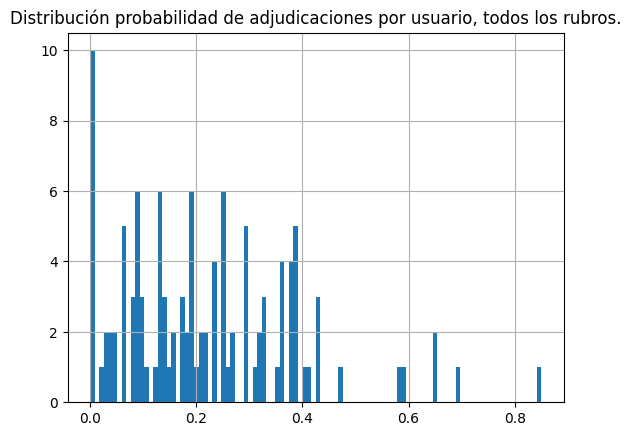

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


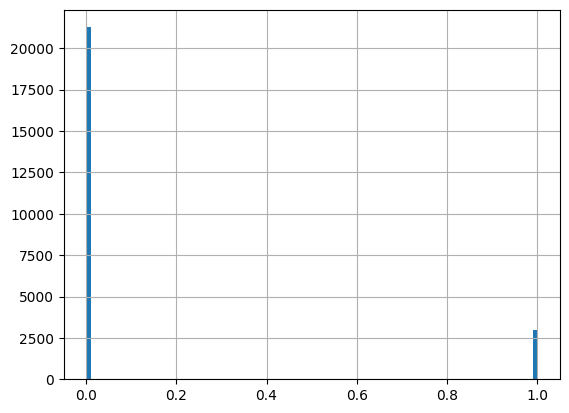

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

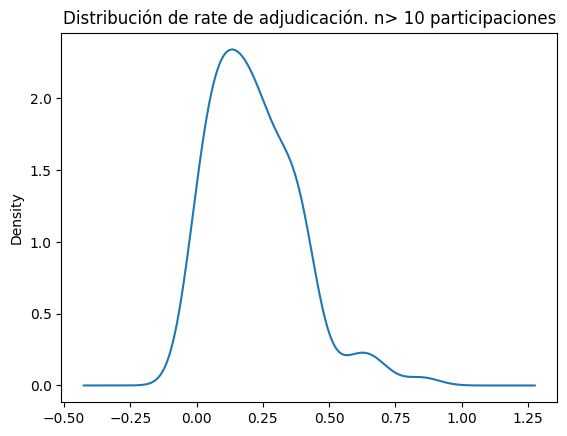

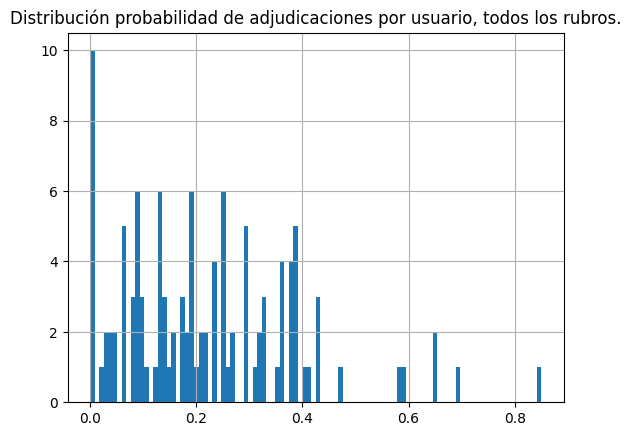

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


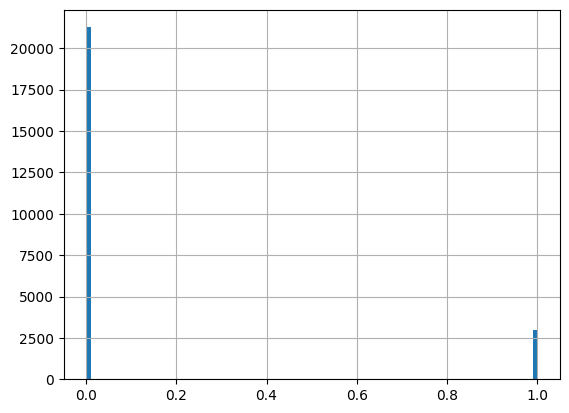

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

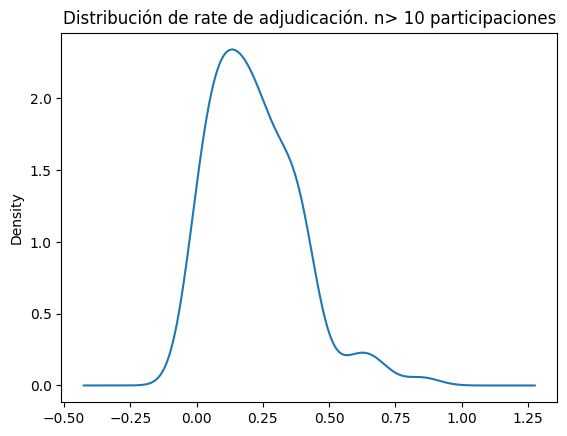

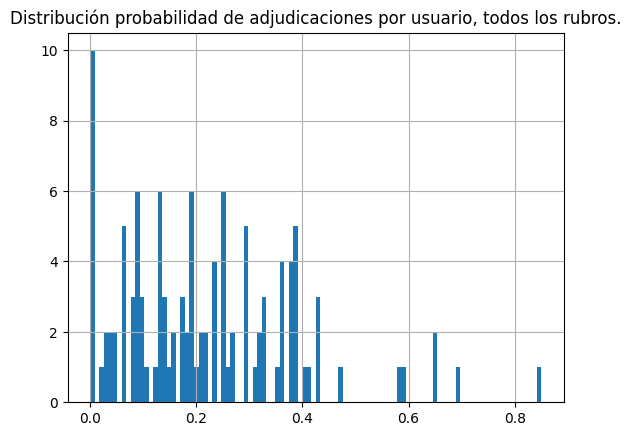

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


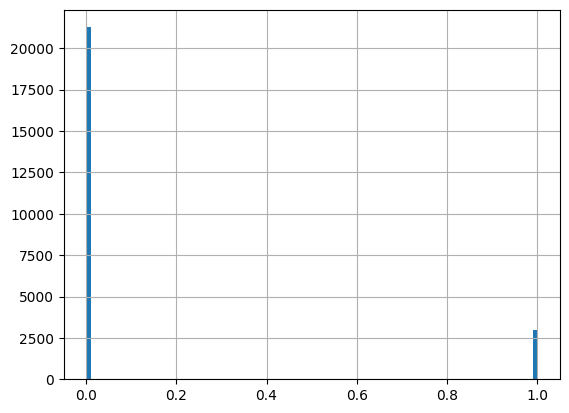

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

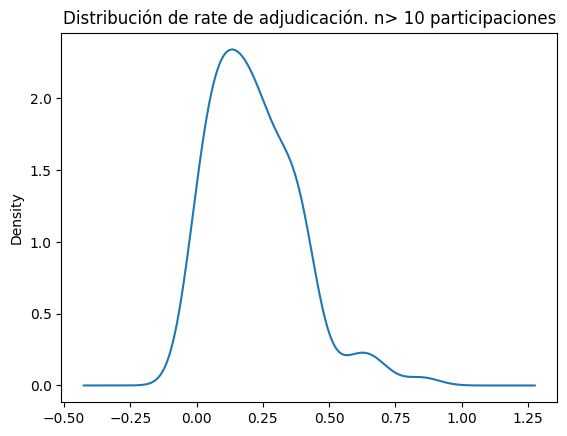

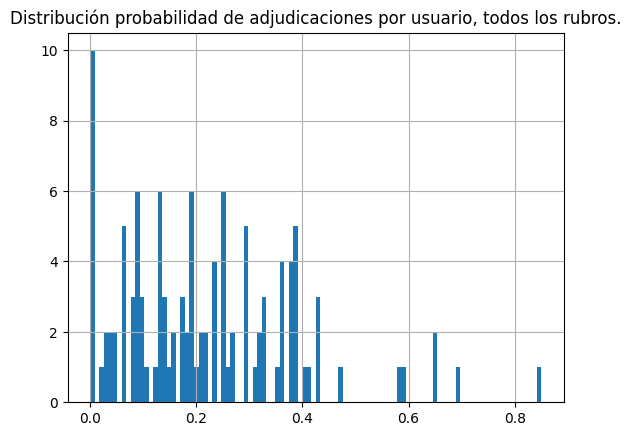

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


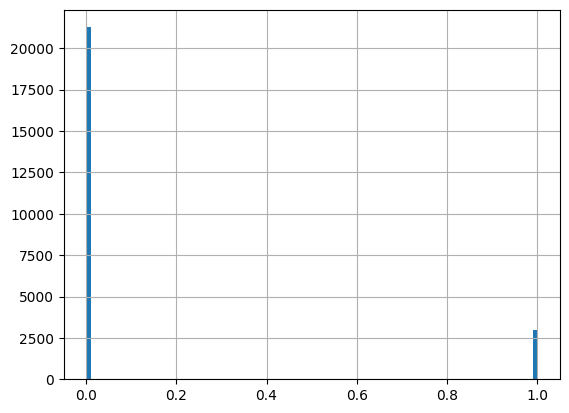

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

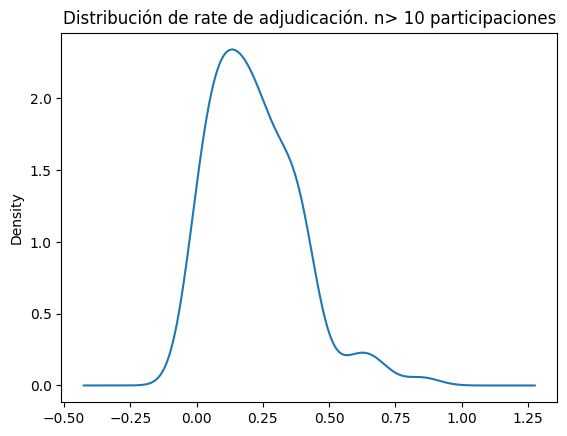

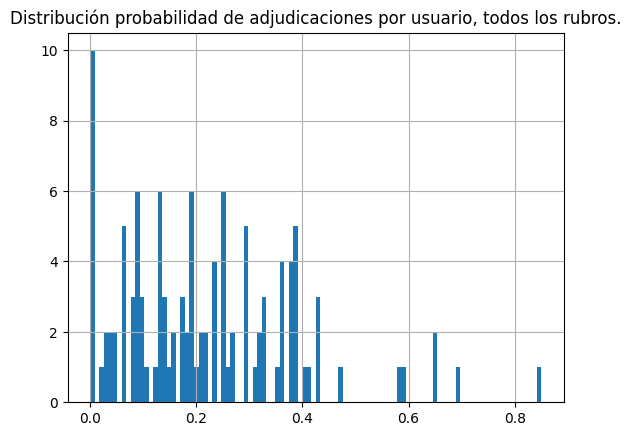

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


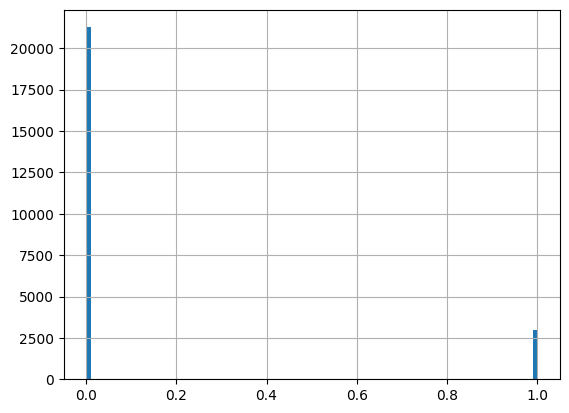

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

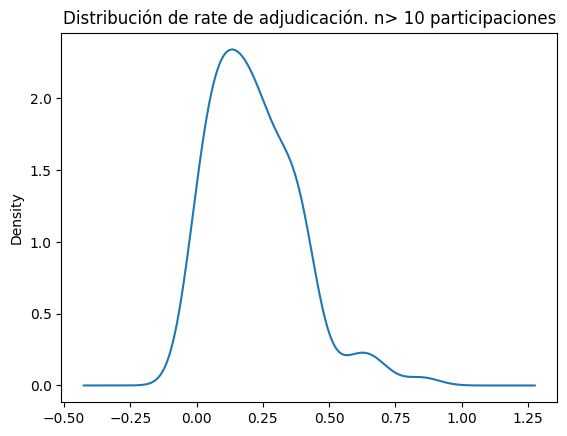

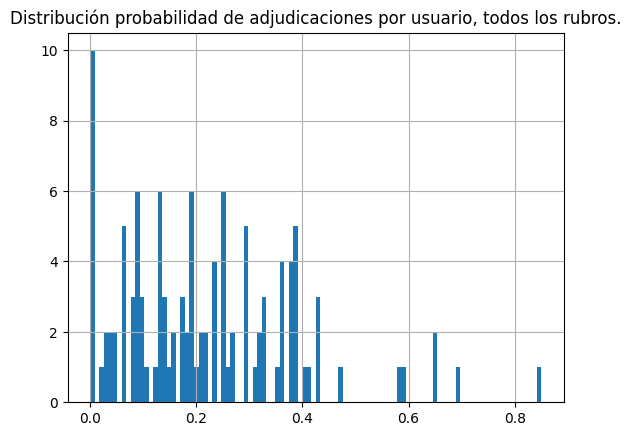

C:\Users\magda\AppData\Local\Temp\ipykernel_26560\3619196181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['numeric'] = merge['adjudicada'].apply(lambda x: 1 if x == True else 0)


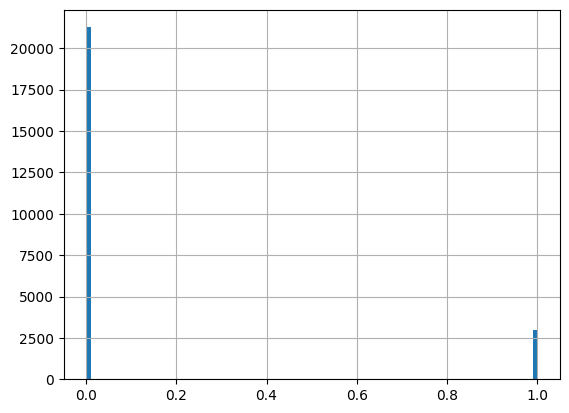

numeric        total adj_rate
adjudicada          False  True                
taxnumberprovider                              
14.016.967-6         58.0   6.0   64.0     0.09
5.923.094-8          17.0  15.0   32.0     0.47
59.043.540-6         19.0   5.0   24.0     0.21
76.018.782-8         37.0   6.0   43.0     0.14
76.030.398-4         15.0   5.0   20.0     0.25
...                   ...   ...    ...      ...
96.859.930-5         24.0   5.0   29.0     0.17
96.884.770-8         65.0  10.0   75.0     0.13
96.945.670-2        158.0  88.0  246.0     0.36
96.981.250-9          9.0  20.0   29.0     0.69
99.565.040-1         16.0   6.0   22.0     0.27

[114 rows x 4 columns]

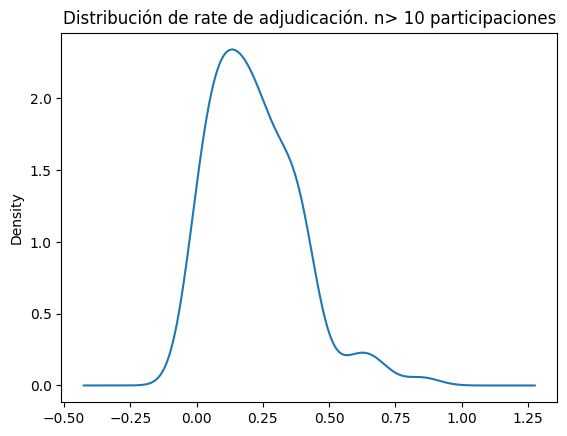

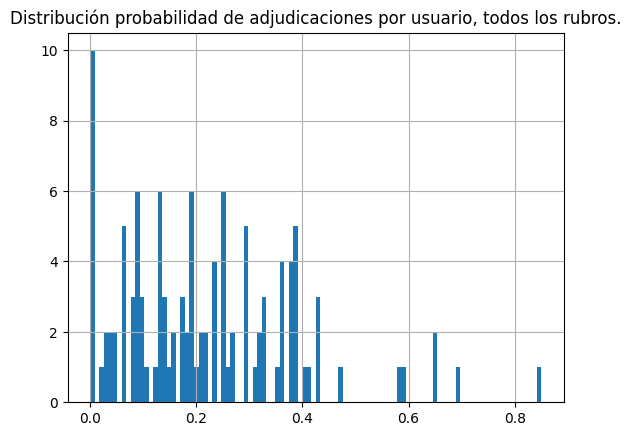

In [102]:
for i in range(max(merge['Cluster'])):
    study_cluster_distro(merge,0,plot = True)